In [1]:
import matplotlib.pyplot as plt
from algorithms import greedy_algorithm, greddy_alternative, dynamic_programming, dynamic_programming_iterative
from aux import create_bribes, create_products, measure_time
from functools import reduce


In [2]:
def stress_test(initial_qty, initial_packs, initial_types, max_iterations, multiplier):
    qty = initial_qty
    packages = initial_packs
    prod_types = initial_types

    iteration = 0
    
    t_qty = []
    t_pack = []
    t_types = []
    n_qty = []
    n_pack = []
    n_type = []
    opt_pack = []
    opt_qty = []
    to_bribe_qty = []
    to_bribe_pack = []
    
    while iteration < max_iterations:
        # fixed product type to 1 and package quantity
        print(qty, initial_packs)
        n_qty.append(qty)
        products = create_products(initial_types, qty, initial_packs)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_qty.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_qty.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_qty.append((tot_greed, tot_greed_alt, tot_dynam))
        
        qty *= multiplier
        
        print(initial_qty, packages)
        # fixed product type to 1 and qty per package
        n_pack.append(packages)
        products = create_products(initial_types, initial_qty, packages)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_pack.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_pack.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_pack.append((tot_greed, tot_greed_alt, tot_dynam))
        
        
        packages *= multiplier
        
        iteration += 1
        
    plt.figure(figsize=(10,8))
    plt.plot(n_qty, t_qty, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion qty unidades por paquete")
    plt.xlabel("Unidades por paquete")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(n_pack, t_pack, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion cantidad de paquetes")
    plt.xlabel("Paquetes totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    return to_bribe_pack,opt_pack, to_bribe_qty, opt_qty        

    


10 5
10 5
100 5
10 50
1000 5
10 500
10000 5
10 5000


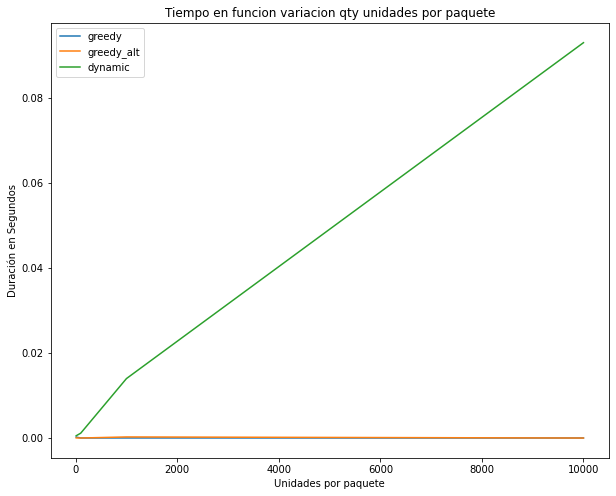

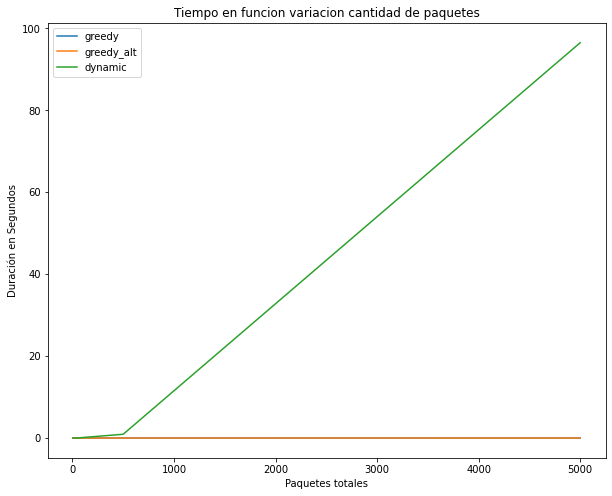

([28, 238, 2294, 10327],
 [(28, 28, 28), (238, 238, 238), (2297, 2294, 2294), (10327, 10327, 10327)],
 [19, 110, 1831, 10415],
 [(22, 19, 19), (144, 131, 114), (2413, 2050, 1885), (18337, 11592, 11592)])

In [6]:
stress_test(10, 5, 1, 4, 10)

In [5]:
sys.setrecursionlimit(100000)

In [4]:
import sys
print(sys.getrecursionlimit())

3000


In [3]:
def stress_test_w_iterative(initial_qty, initial_packs, initial_types, max_iterations, multiplier):
    qty = initial_qty
    packages = initial_packs
    prod_types = initial_types

    iteration = 0
    
    t_qty = []
    t_pack = []
    t_types = []
    n_qty = []
    n_pack = []
    n_type = []
    opt_pack = []
    opt_qty = []
    to_bribe_qty = []
    to_bribe_pack = []
    
    while iteration < max_iterations:
        # fixed product type to 1 and package quantity
        print(qty, initial_packs)
        n_qty.append(qty)
        products = create_products(initial_types, qty, initial_packs)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming_iterative, products, asked_bribe)
        
        t_qty.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_qty.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_qty.append((tot_greed, tot_greed_alt, tot_dynam))
        
        qty *= multiplier
        
        print(initial_qty, packages)
        # fixed product type to 1 and qty per package
        n_pack.append(packages)
        products = create_products(initial_types, initial_qty, packages)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming_iterative, products, asked_bribe)
        
        t_pack.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_pack.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_pack.append((tot_greed, tot_greed_alt, tot_dynam))
        
        
        packages *= multiplier
        
        iteration += 1
        
    plt.figure(figsize=(10,8))
    plt.plot(n_qty, t_qty, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion qty unidades por paquete")
    plt.xlabel("Unidades por paquete")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(n_pack, t_pack, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion cantidad de paquetes")
    plt.xlabel("Paquetes totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    return to_bribe_pack,opt_pack, to_bribe_qty, opt_qty        

    


10 10
10 10
100 10
10 100
1000 10
10 1000
10000 10
10 10000


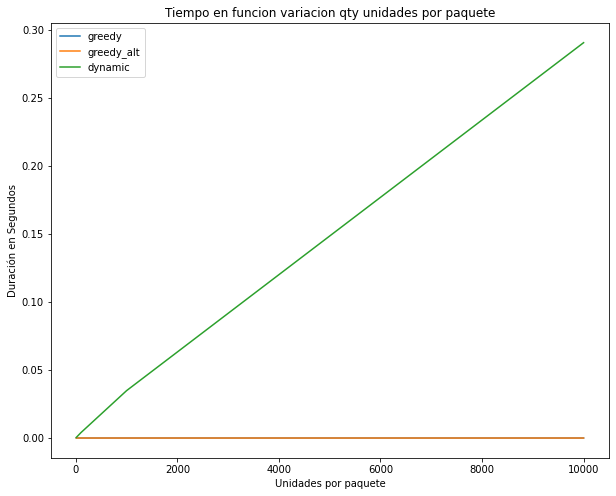

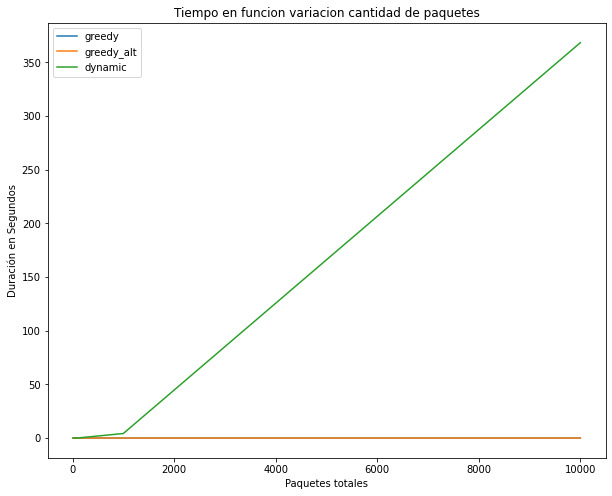

([42, 240, 2626, 27416],
 [(44, 42, 42), (247, 240, 240), (2630, 2626, 2626), (27417, 27416, 27416)],
 [51, 8, 4268, 26024],
 [(52, 52, 52), (97, 14, 14), (4589, 4293, 4278), (29921, 26486, 26043)])

In [4]:
stress_test_w_iterative(10, 10, 1, 4, 10)